# **Token Ring**


## **Задача:**


Нахождение зависимости оптимального размера буффера от количества нод в системе токен ринг для систем с малым количеством участников.

Задача состоит в сравнении Задержки и пропускной способности сетей в зависимости от размера буффера медиума (размер буффера варьируется от 1 до количества нод) при разной степени загруженности сети, а также разном количестве нод - участников

## **Модель:**


В качестве модели создана реализация системы Token Ring (код выложен на GitHub: [Token Ring Implementation](https://github.com/UkhovArty/TokenRingImpl)) с медиумами, смоделированными с помощью ArrayBlockingQueue реализации блокирующих очередей из пакета java.util.concurrent.

Каждая нода системы запускается в отдельном потоке.

За токен принимается пакет, содержащий информацию об отправителе и получателе, а также время отправления, для возможности замера задержки в системе.

В данной модели подразумевается, что ноды не уничтожают сообщения, предназначеные им, но тем не менее моделируется некоторое время, затрачиваемое на обработку данного сообщения (данное время моделируется с помощью кода для измерения задержки и пропускной способности)

 ## **Понятия:**

* **Малое количество участников:** система содержащая <= 10 нод 
* **Задержка (one side trip latency):** за задержку в данном эксперименте принимается время между отправкой пакета с одной из нод-участников и получением данного пакета на ноде, для которой данный пакет был предназначен.
* **Пропускная способность сети:** Количество сообщений прошедших по сети за единицу времени, в случае данного эксперимента берется количество сообщений прошедших через определенную ноду за одну секунду

## **Гипотезы:**
 

* Размер очередей влияет на пропускную способность системы, а именно увеличивает ее, поскольку снижает потребность в ожидании доступности других нод/очередей.
* Размер очередей возможно уменьшает задержку в системе, по тем же причинам, либо не имеет на нее влияния.

## **Эксперимент:**

**Характеристики системы,  на которой проводится эксперимент:**

Ноутбук asus с Процессором: Intel(R) Core(TM) i5-3337U CPU @ 1.80GHz 1.80GHz, RAM: 8Gb DDR3, OS: Windows 10.

**Описание тестирования:**

Система тестируется в ручном режиме, с использованием junit тестирования. Перед каждым измерением задержки и пропускной способности проводится прогрев системы путем проброса по системе одного сообщения в цикле втечение 30 секунд. Таким образом код модели является скомпиллированным, посколько стандартное значение для "Горячих методов" - 5000 вызовов.


## **Задержка в зависимости от размера буффера для разного количества нод:**

Для начала исследуем зависимсимость задержки в системе от размеров очередей, для колец с разным количеством нод (от 1 до 6). Моя рабочая станция не позволяет корректно оценивать системы с большим количеством нод (если быть честным, то не позволяет корректно воспринимать информацию также с системами с количеством нод больше 4). Размеры очередей будут варьироваться от 1 до N = количеству нод в системе.

Для каждой конфигурации системы исследуются три наиболее важных режима работы сети:
* Слабозагруженная/незагруженная сеть - 15% от максимального количества сообщений в системе
* Нормальный режим работы сети ~ 50%
* Перегруженная сеть - >= 80%

Таким образом, каждая конфигурация состоит из трех основных параметров: 
* Количество нод в системе
* Размер очередей/буффера (далее capacity)
* Режим работы системы: (Low, Medium, High)


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as patches

In [57]:
latencies = latencies.dropna()
latencies = latencies.astype('int')
latencies.head(4)

,2n1c1m,2n1c2m,2n1c3m,2n2c1m,2n2c3m,2n2c5m,3n1c1m,3n1c3m,3n1c5m,3n2c1m,3n2c5m,3n2c7m,3n3c2m,3n3c6m,3n3c10m,4n1c1m,4n1c4m,4n1c6m,4n2c2m,4n2c6m,4n2c10m,4n3c2m,4n3c8m,4n3c13m,4n4c3m,4n4c10m,4n4c16m,5n1c1m,5n1c5m,5n1c8m,5n2c2m,5n2c8m,5n2c12m,5n3c3m,5n3c10m,5n3c16m,5n4c3m,5n4c13m,5n4c20m,5n5c4m,5n5c15m,5n5c24m,6n1c2m,6n1c6m,6n1c10m,6n2c2m,6n2c9m,6n2c15m,6n3c3m,6n3c12m,6n3c20m,6n4c4m,6n4c15m,6n4c24m,6n5c5m,6n5c18m,6n5c29m,6n6c6m,6n6c21m,6n6c34m
28,8600,21400,116400,24800,5400,30000,26899,55900,56500,9001,31801,63899,16299,9500,375900,43000,44000,77500,38300,55200,94100,25300,37100,80000,18200,33000,75200,50200,60200,184100,62900,52300,139300,44600,42400,150500,32700,39800,135300,47100,600200,177500,30000,76200,155100,79400,56500,156800,57700,350200,158900,55400,527800,248100,68200,528800,148700,61900,1396700,187400
29,13400,40000,20900,12200,14500,29100,32100,19299,59200,34000,42399,41101,28600,10601,60301,39200,54200,79400,48700,33300,94100,40300,278400,82300,41700,33000,90200,24300,72300,186400,48100,155900,116800,49800,42100,150500,32500,44500,115600,43000,319500,177500,28900,75300,155100,104600,56500,156800,60200,396000,160100,66600,718600,150800,67000,601800,129500,67600,849300,128500
30,15200,35700,18500,10200,7800,30700,24000,16600,63800,26399,24000,34800,26900,17100,57800,42000,44100,79400,51700,33300,92700,38800,279400,85300,33700,47200,59000,25000,61600,101200,37400,320500,97500,49800,43300,126900,45500,59400,114500,53500,313800,126100,57100,244300,155100,74200,56500,156800,65600,416700,189300,66800,717900,181600,67600,1090500,181900,69300,697300,128500
31,12300,7800,18800,14200,6400,38100,22200,21001,60400,20801,21800,42600,36500,30500,62800,40300,31400,494900,38500,622900,153100,40100,198600,76500,122000,47200,839600,18700,134600,158200,63300,302500,423100,40700,51700,123900,38500,78900,171900,62000,42600,121000,61900,387500,155100,76000,56500,156800,67500,397500,455800,68500,447300,122700,67700,838900,115900,63000,761200,128500


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

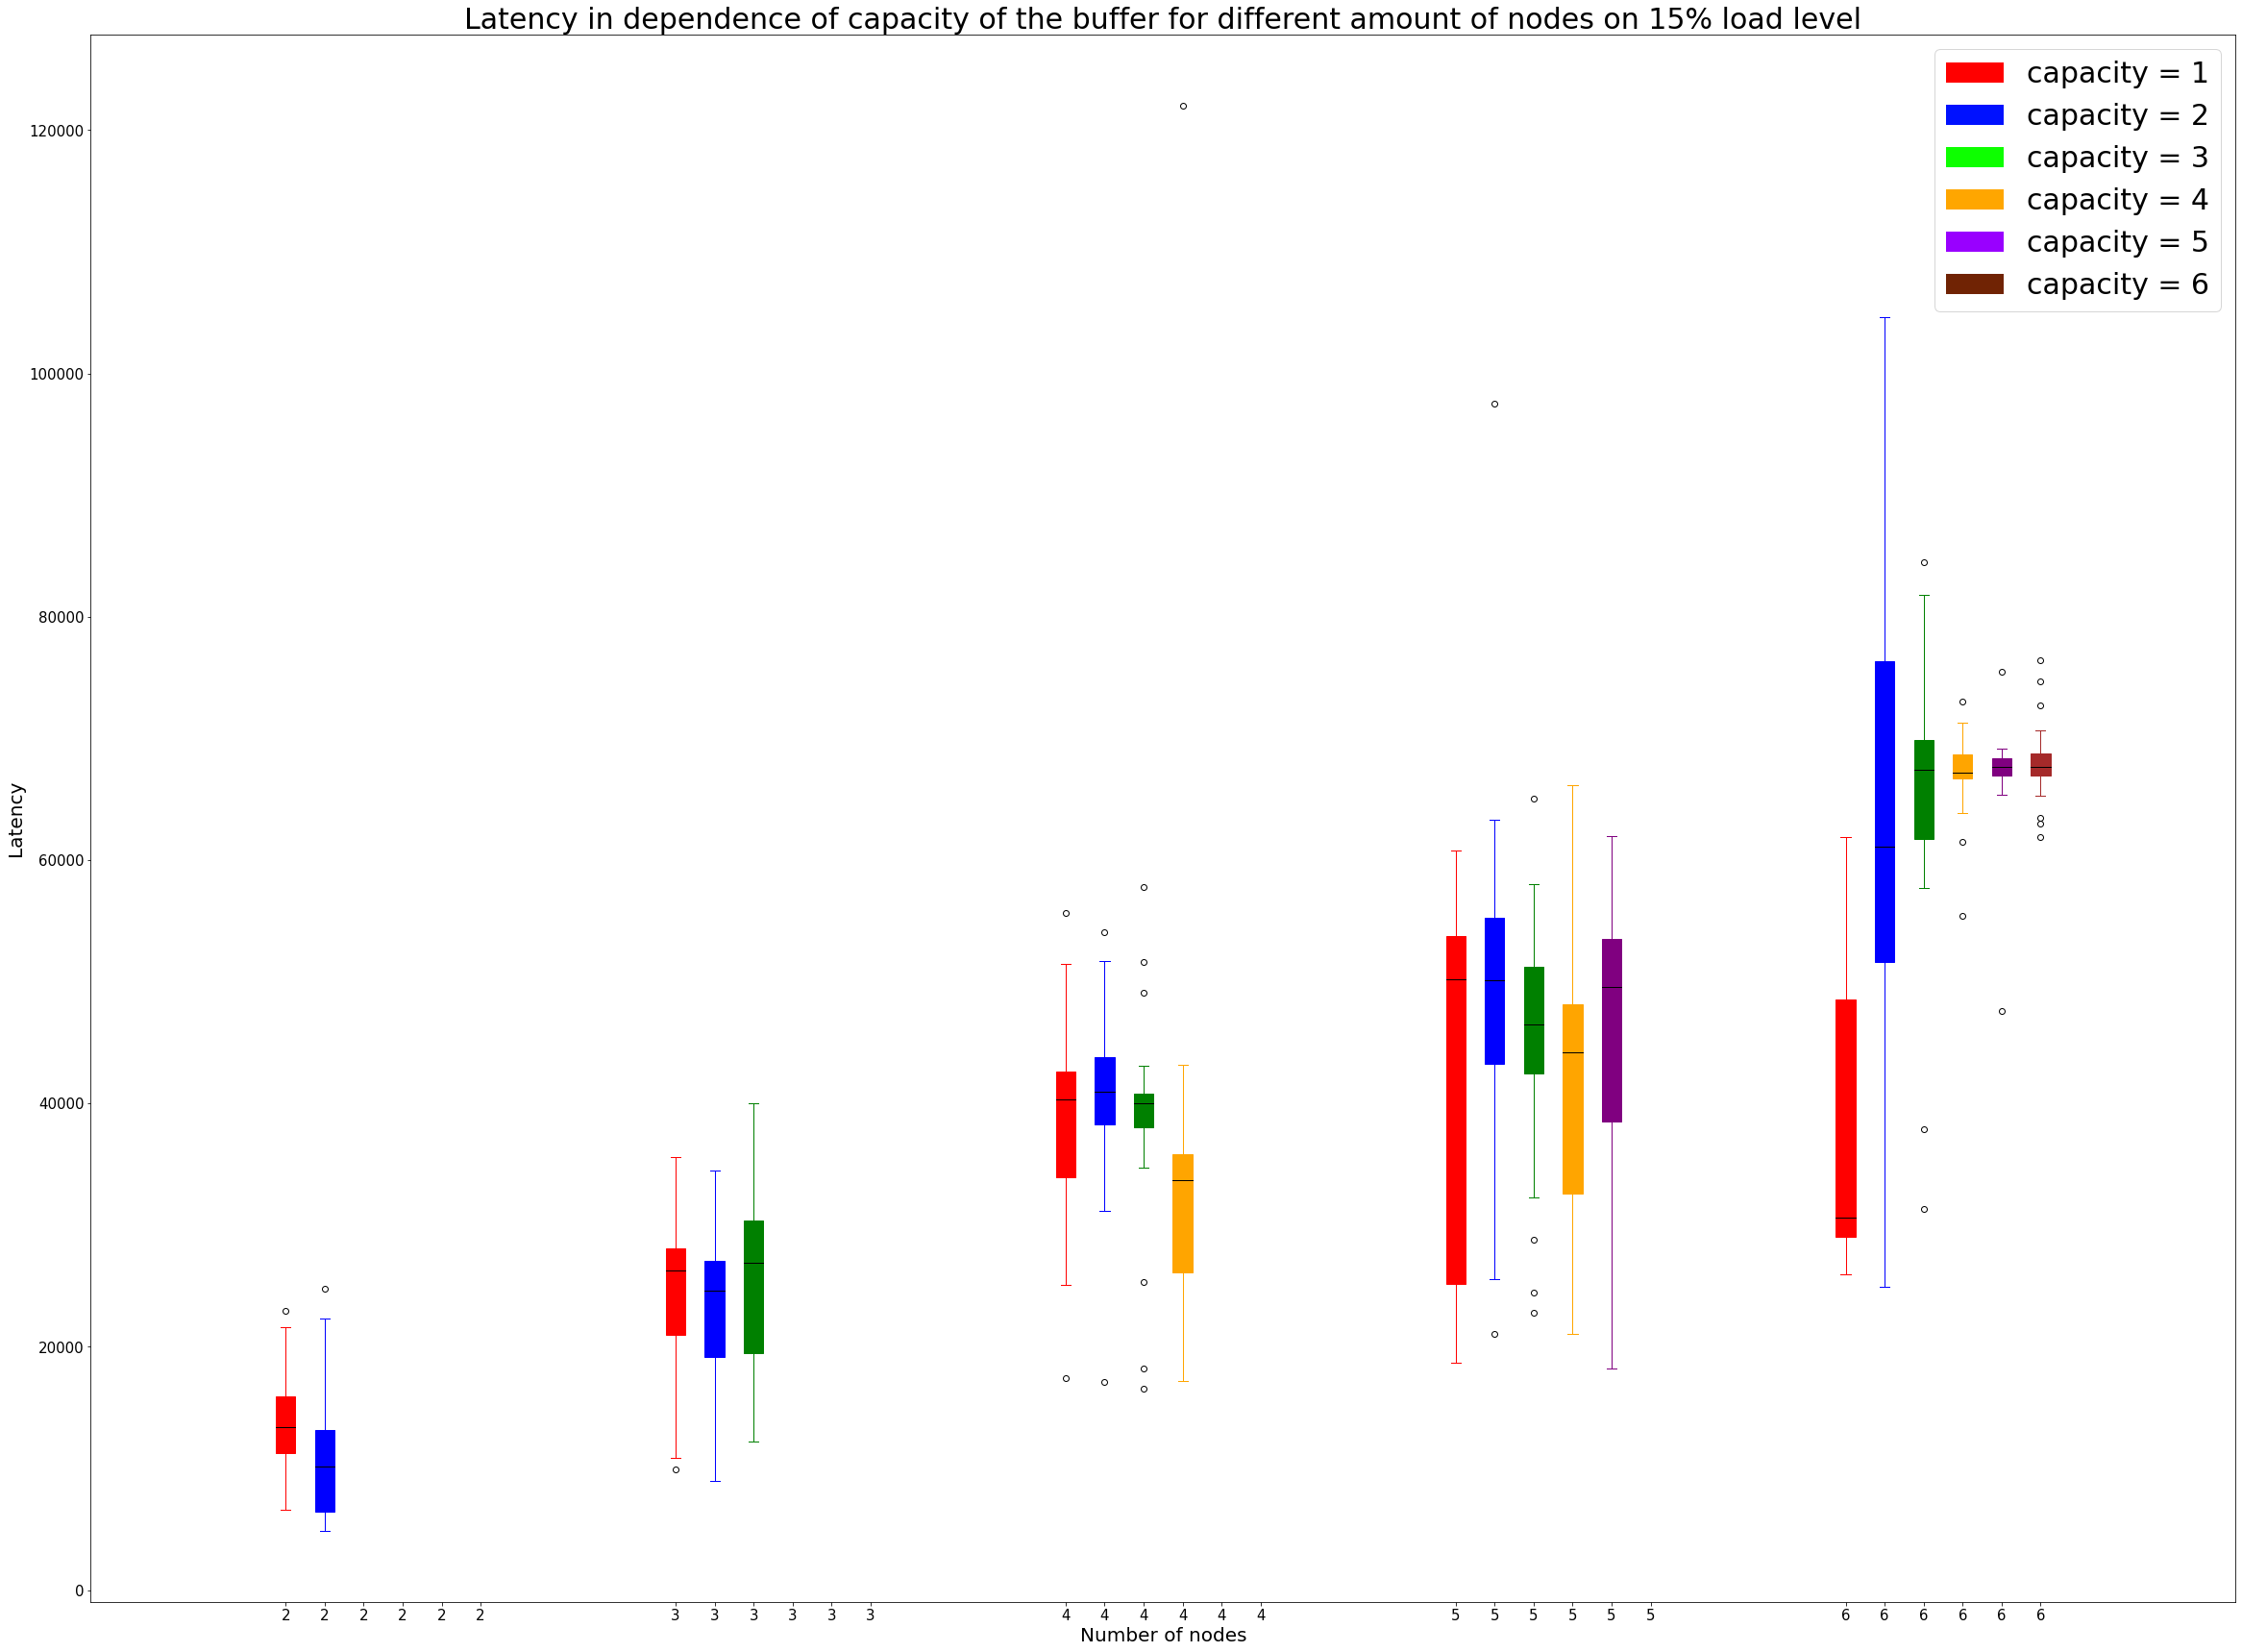

In [58]:
import matplotlib.patches as patches

def draw_plot(data, edge_color, fill_color, offset):
    bp = ax.boxplot(data, positions = [1 + offset, 2 + offset, 3 + offset, 4 + offset, 5 + offset], widths=0.05, patch_artist=True, labels= [2,3,4,5,6]) 
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'caps']:
        plt.setp(bp[element], color=edge_color)
    plt.setp(bp['medians'], color = 'black')
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color) 
fig, ax = plt.subplots(figsize=(40,30))
draw_plot([latencies['2n1c1m'].values, latencies['3n1c1m'].values, latencies['4n1c1m'].values, latencies['5n1c1m'].values, latencies['6n1c2m'].values], 'red', 'red', -0.2)
draw_plot([latencies['2n2c1m'].values, latencies['3n2c1m'].values, latencies['4n2c2m'].values, latencies['5n2c2m'].values, latencies['6n2c2m'].values], 'blue', 'blue', - 0.1)
draw_plot([[], latencies['3n3c2m'].values, latencies['4n3c2m'].values, latencies['5n3c3m'].values, latencies['6n3c3m'].values], 'green', 'green', +0)
draw_plot([[], [], latencies['4n4c3m'].values, latencies['5n4c3m'].values, latencies['6n4c4m'].values], 'orange', 'orange', + 0.1)
draw_plot([[], [], [], latencies['5n5c4m'].values, latencies['6n5c5m'].values], 'purple', 'purple', + 0.2)
draw_plot([[], [], [], [], latencies['6n6c6m'].values], 'brown', 'brown', + 0.3)
labels = ['capacity = 1', 'capacity = 2', 'capacity = 3', 'capacity = 4', 'capacity = 5', 'capacity = 6']
rect1 = patches.Rectangle((0,0),1,1,facecolor='#ff0000')
rect2 = patches.Rectangle((0,0),1,1,facecolor='#0011ff')
rect3 = patches.Rectangle((0,0),1,1,facecolor='#0dff00')
rect4 = patches.Rectangle((0,0),1,1,facecolor='#ffa600')
rect5 = patches.Rectangle((0,0),1,1,facecolor='#9900ff')
rect6 = patches.Rectangle((0,0),1,1,facecolor='#702304')
plt.xlabel('Number of nodes', fontsize = 20)
plt.ylabel('Latency', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title( 'Latency in dependence of capacity of the buffer for different amount of nodes on 15% load level', fontsize = 30)   
plt.legend((rect1, rect2, rect3, rect4, rect5, rect6), labels, prop={'size': 30})
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

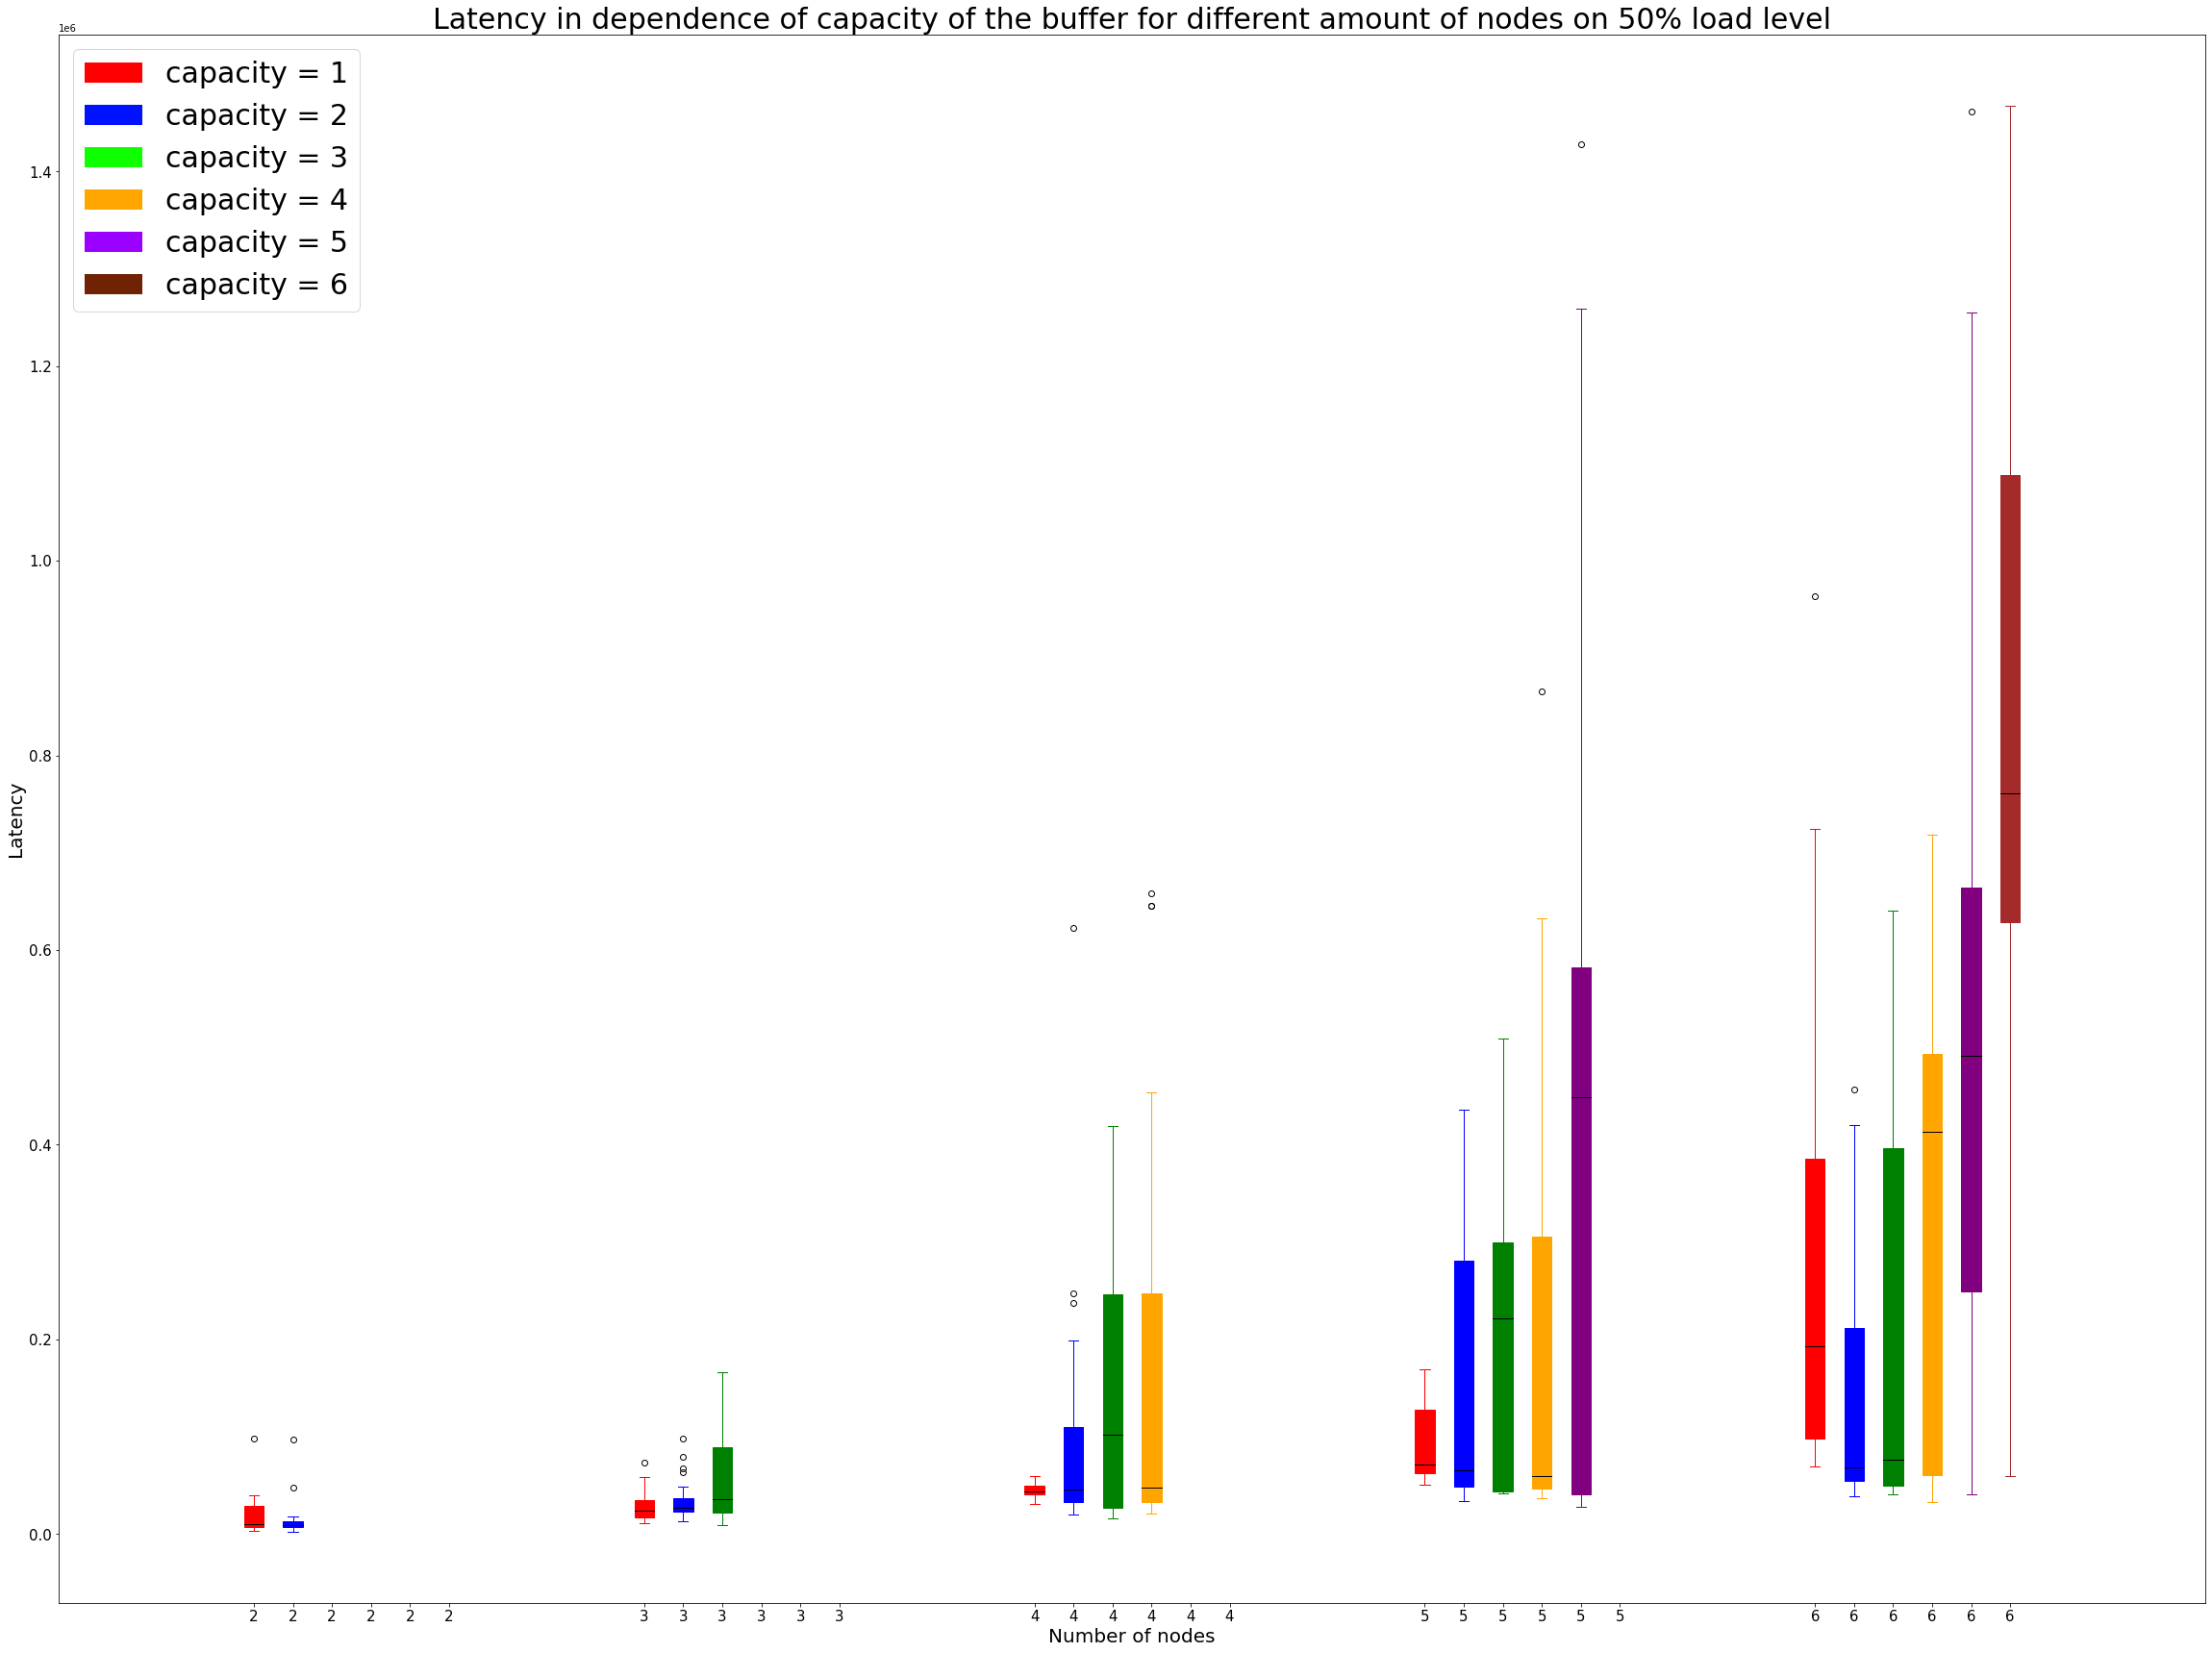

In [59]:
fig, ax = plt.subplots(figsize=(40,30))
draw_plot([latencies['2n1c2m'].values, latencies['3n1c3m'].values, latencies['4n1c4m'].values, latencies['5n1c5m'].values, latencies['6n1c6m'].values], 'red', 'red', -0.2)
draw_plot([latencies['2n2c3m'].values, latencies['3n2c5m'].values, latencies['4n2c6m'].values, latencies['5n2c8m'].values, latencies['6n2c9m'].values], 'blue', 'blue', - 0.1)
draw_plot([[], latencies['3n3c6m'].values, latencies['4n3c8m'].values, latencies['5n3c10m'].values, latencies['6n3c12m'].values], 'green', 'green', + 0.0)
draw_plot([[], [], latencies['4n4c10m'].values, latencies['5n4c13m'].values, latencies['6n4c15m'].values], 'orange', 'orange', + 0.1)
draw_plot([[], [], [], latencies['5n5c15m'].values, latencies['6n5c18m'].values], 'purple', 'purple', + 0.2)
draw_plot([[], [], [], [], latencies['6n6c21m'].values], 'brown', 'brown', + 0.3)
plt.xlabel('Number of nodes', fontsize = 20)
plt.ylabel('Latency', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title( 'Latency in dependence of capacity of the buffer for different amount of nodes on 50% load level', fontsize = 30)   

plt.legend((rect1, rect2, rect3, rect4, rect5, rect6), labels, prop={'size': 30})
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

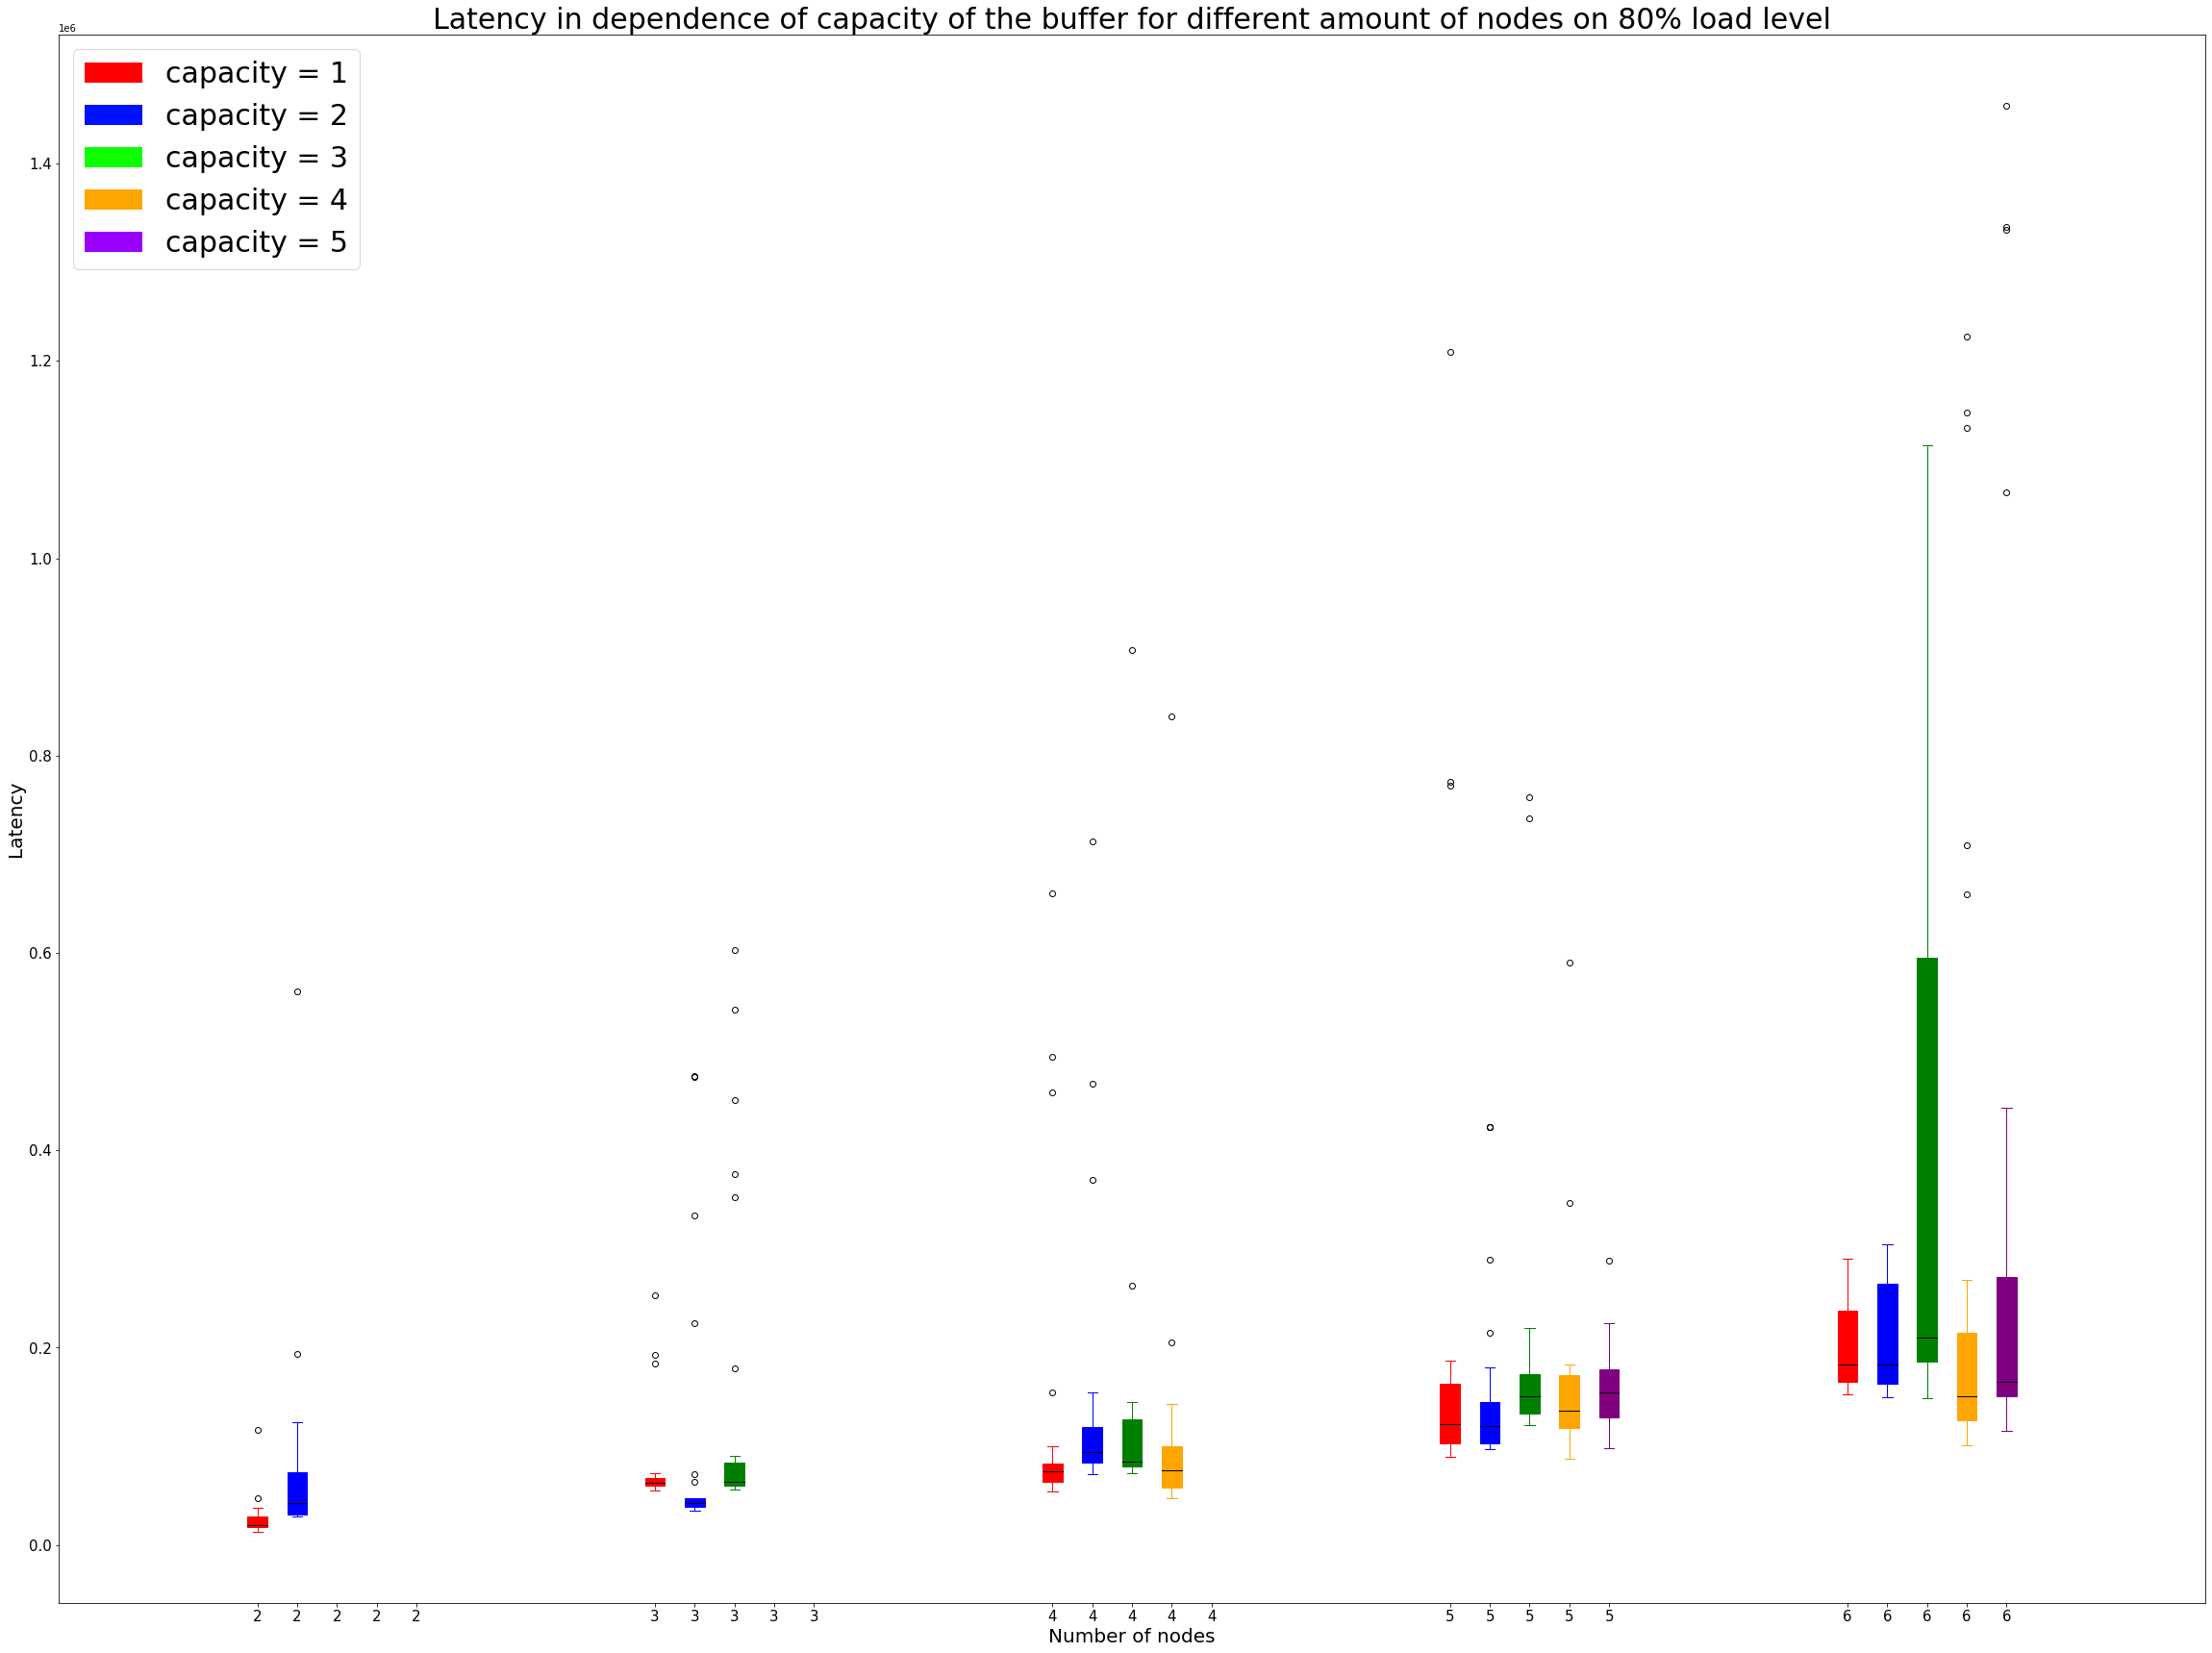

In [61]:
fig, ax = plt.subplots(figsize=(40,30))
draw_plot([latencies['2n1c3m'].values, latencies['3n1c5m'].values, latencies['4n1c6m'].values, latencies['5n1c8m'].values, latencies['6n1c10m'].values], 'red', 'red', -0.2)
draw_plot([latencies['2n2c5m'].values, latencies['3n2c7m'].values, latencies['4n2c10m'].values, latencies['5n2c12m'].values, latencies['6n2c15m'].values], 'blue', 'blue', - 0.1)
draw_plot([[], latencies['3n3c10m'].values, latencies['4n3c13m'].values, latencies['5n3c16m'].values, latencies['6n3c20m'].values], 'green', 'green', + 0.0)
draw_plot([[], [], latencies['4n4c16m'].values, latencies['5n4c20m'].values, latencies['6n4c24m'].values], 'orange', 'orange', + 0.1)
draw_plot([[], [], [], latencies['5n5c24m'].values, latencies['6n5c29m'].values], 'purple', 'purple', + 0.2)
labels = ['capacity = 1', 'capacity = 2', 'capacity = 3', 'capacity = 4', 'capacity = 5']
plt.xlabel('Number of nodes', fontsize = 20)
plt.ylabel('Latency', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title( 'Latency in dependence of capacity of the buffer for different amount of nodes on 80% load level', fontsize = 30)   
plt.legend((rect1, rect2, rect3, rect4, rect5), labels, prop={'size': 30})
plt.show()

## **Вывод по зависимости задержки от размера буффера:** 

Судя по представленным иллюстрациям можно заключить, что размер буффера не имеет какого-либо явно выраженного влияния на величину задержки в сети.

## **Пропускная способность в зависимости от размера буффера и количества нод:**

Пропускная способность исследуется сходным образом в плане понятия конфигурации системы.

Для измерения пропускной способности нодам добавлен функционал, позволяющий рассчитывать количество сообщений, прошедших через данную ноду в единицу времени (1с).

In [4]:
throughputs = pd.read_csv('Throughput.csv', delimiter=";")

In [5]:
throughputs = throughputs.dropna()
throughputs = throughputs.astype('int')
throughputs.head(4)

,2n1c1m,2n1c2m,2n1c3m,2n2c1m,2n2c3m,2n2c5m,4n1c1m,4n1c4m,4n1c6m,4n2c2m,4n2c6m,4n2c10m,4n3c2m,4n3c8m,4n3c13m,4n4c3m,4n4c10m,4n4c16m,5n1c1m,5n1c5m,5n1c8m,5n2c2m,5n2c8m,5n2c12m,5n3c3m,5n3c10m,5n3c16m,5n4c3m,5n4c13m,5n4c20m,5n5c4m,5n5c15m,5n5c24m,6n1c2m,6n1c6m,6n1c10m,6n2c2m,6n2c9m,6n2c15m,6n3c3m,6n3c12m,6n3c20m,6n4c4m,6n4c15m,6n4c24m,6n5c5m,6n5c18m,6n5c29m,6n6c6m,6n6c21m,6n6c34m,3n1c1m,3n1c3m,3n1c5m,3n2c1m,3n2c5m,3n2c7m,3n3c2m,3n3c6m,3n3c10m
0,47828,58348,69146,39410,181288,60462,20744,70888,54824,40942,98636,53762,42304,111804,100162,63466,145916,138970,17440,48194,35228,33276,62542,69738,49224,70680,71848,48930,108954,75856,62382,99160,111454,30348,35678,24114,26510,84074,37750,42392,99346,68632,54960,92088,69108,71970,70246,78980,90710,117350,88324,32158,63106,50870,28674,83424,95308,62418,126400,69826
1,47826,58348,69146,39406,181286,60462,20742,70884,54822,40944,98640,53758,42304,111806,100162,63466,145906,138978,17440,48196,35228,33276,62542,69738,49224,70678,71850,48928,108962,75856,62390,99150,111464,30880,35678,24110,26510,84076,37750,42390,99346,68636,54952,92090,69108,71970,70254,78992,90698,117336,88312,32156,63108,50870,28674,83506,95312,62412,126398,69826
2,36406,55170,68694,36740,105902,53768,20742,70886,54824,40944,98638,53762,42300,111812,100156,63466,145906,138978,17440,48194,35228,33276,62544,69738,49224,70672,71850,48930,108964,75856,62382,99154,111454,30876,35680,24110,26510,84074,37748,42390,99340,68638,54952,92096,69108,71970,70266,78992,90698,117322,88310,32156,63108,50870,28672,83510,95312,62412,126396,69826
3,36408,55266,68692,36742,105898,53764,20744,70884,54822,40944,98638,53762,42302,111806,100156,63466,145916,138970,17440,48192,35228,33254,62548,69738,49224,70668,71848,48922,108970,75848,62382,99158,111454,30876,35676,24110,26508,84076,37748,42390,99336,68638,54952,92096,69108,71970,70280,78992,90698,117320,88320,24796,61970,51582,25074,102790,93626,51402,125734,97586


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

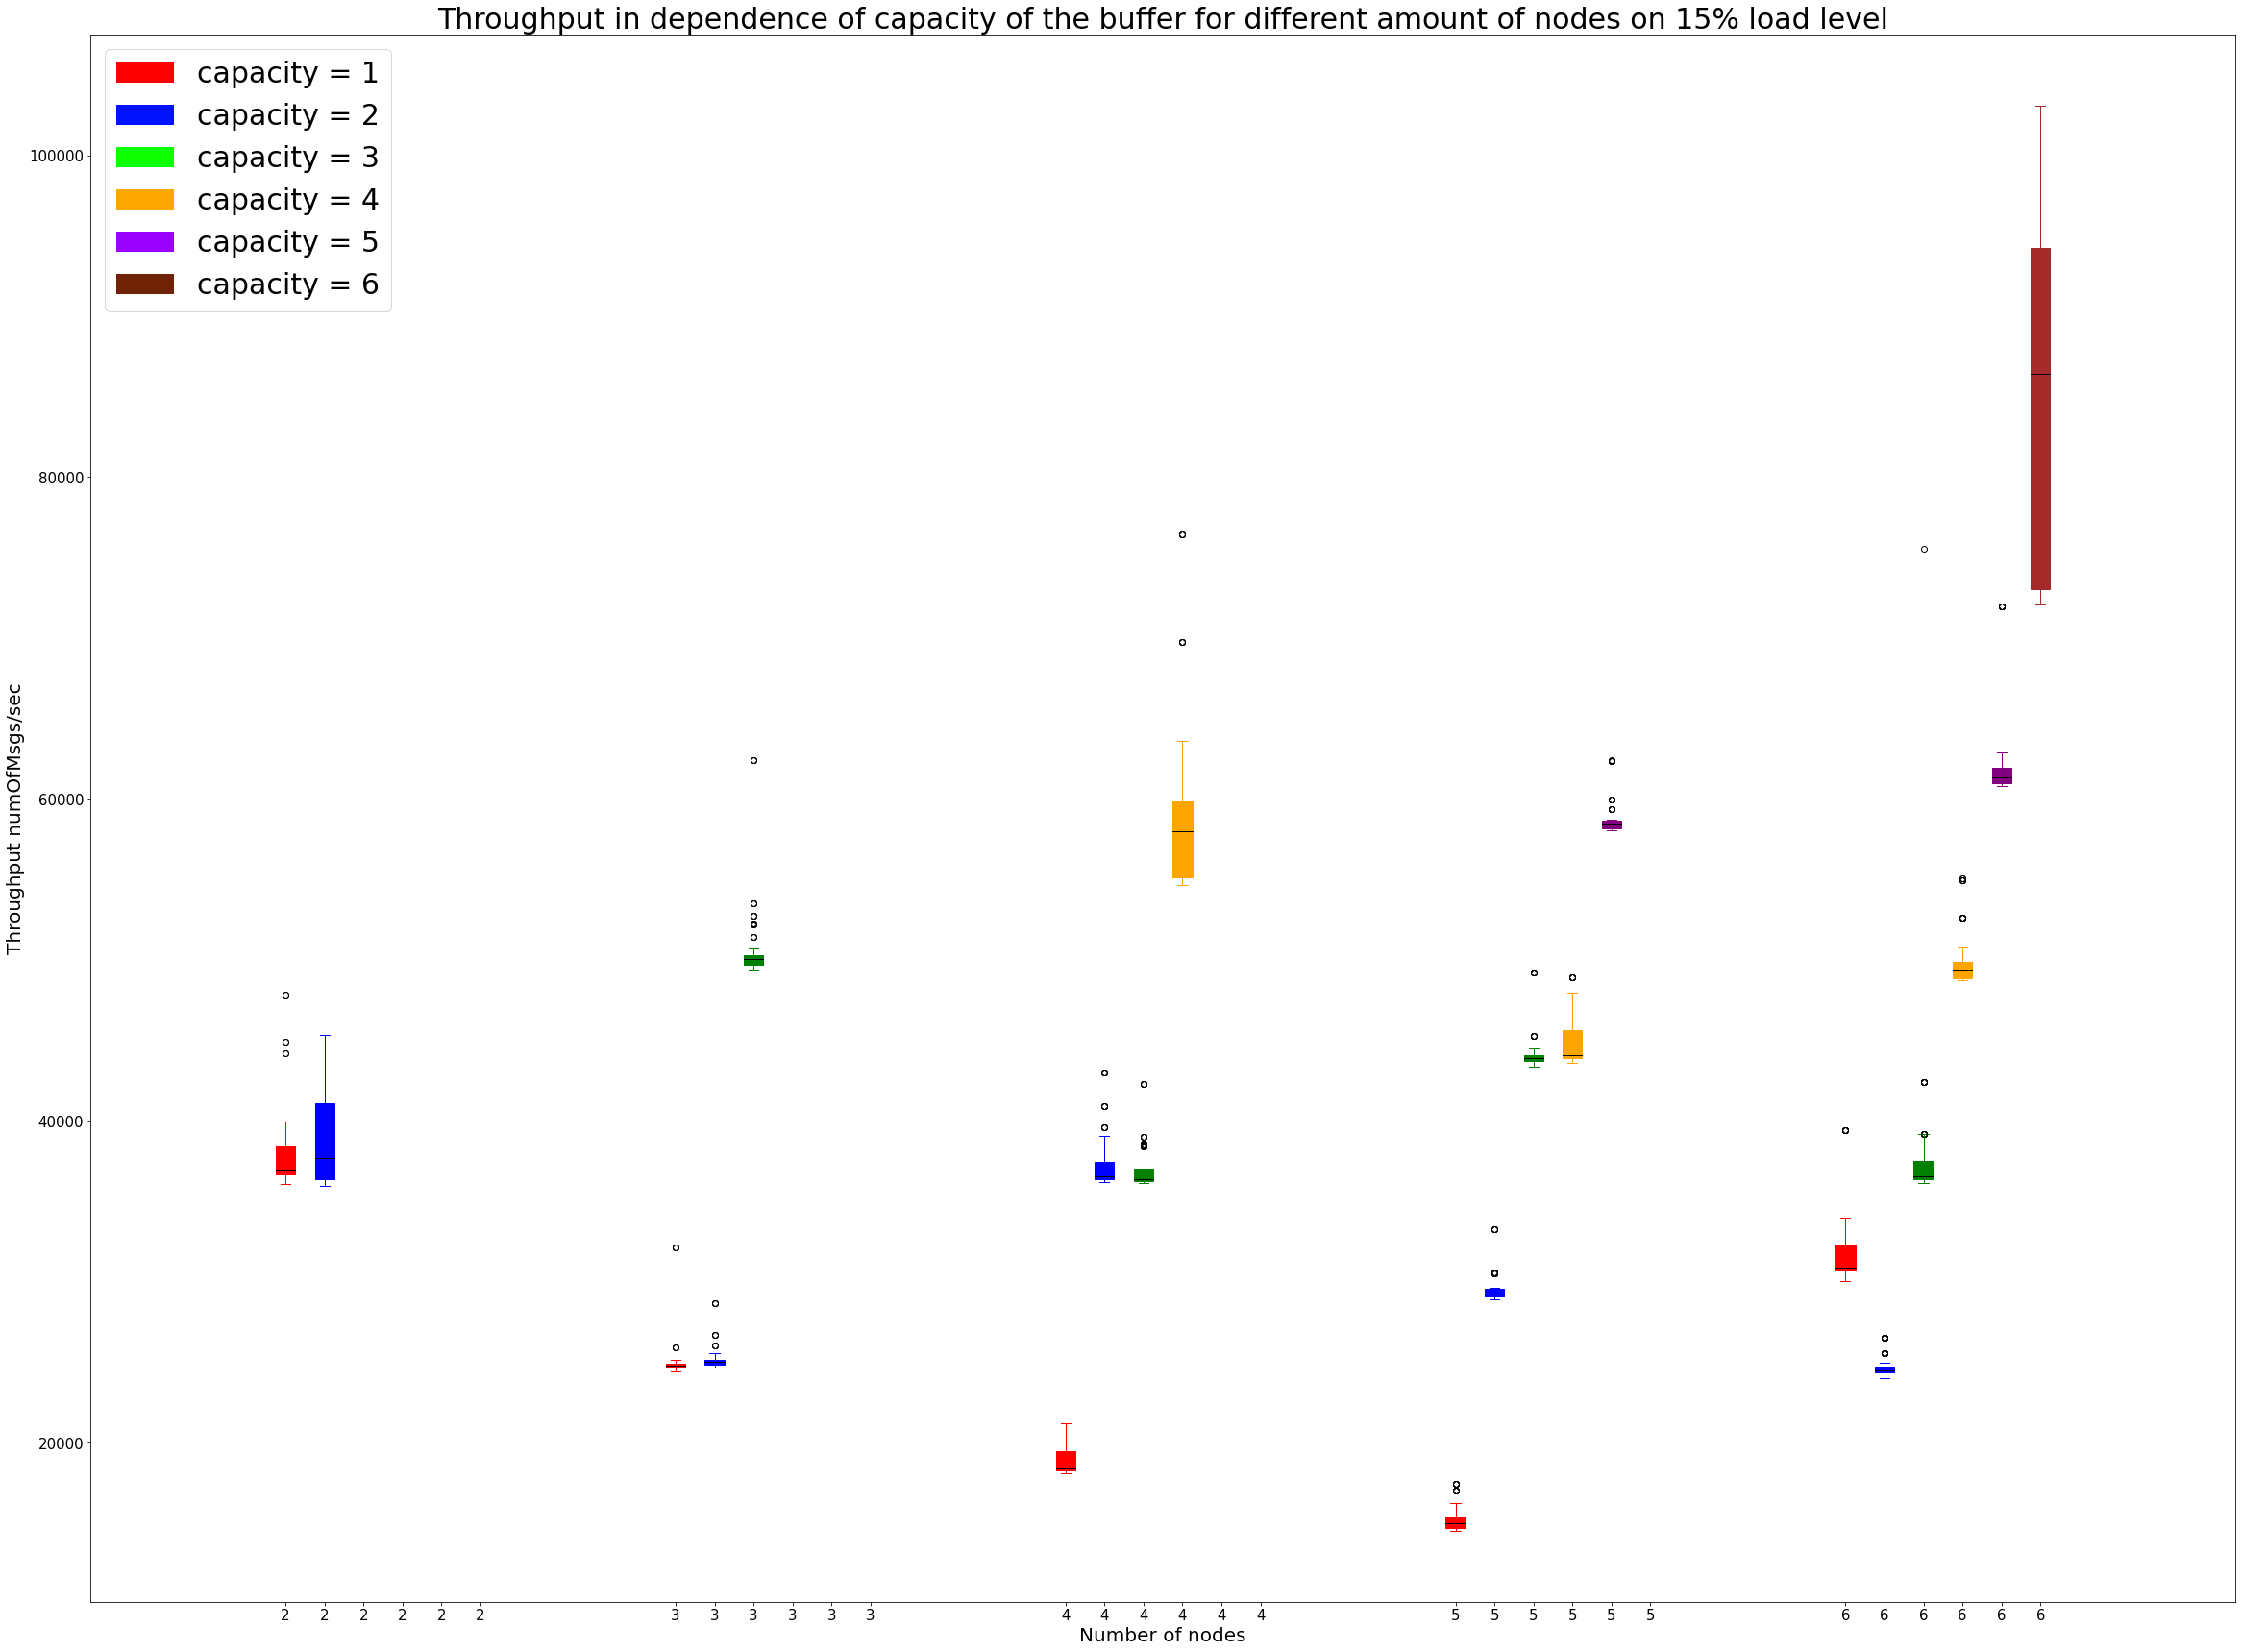

In [62]:
def draw_thputs(data, edge_color, fill_color, offset):
    bp = ax.boxplot(data, positions = [1 + offset, 2 + offset, 3 + offset, 4 + offset, 5 + offset], widths=0.05, patch_artist=True, labels= [2,3,4,5,6]) 
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'caps']:
        plt.setp(bp[element], color=edge_color)
    plt.setp(bp['medians'], color = 'black')
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color) 
  
fig, ax = plt.subplots(figsize=(40,30))
draw_thputs([throughputs['2n1c1m'].values, throughputs['3n1c1m'].values, throughputs['4n1c1m'].values, throughputs['5n1c1m'].values, throughputs['6n1c2m'].values], 'red', 'red', -0.2)
draw_thputs([throughputs['2n2c1m'].values, throughputs['3n2c1m'].values, throughputs['4n2c2m'].values, throughputs['5n2c2m'].values, throughputs['6n2c2m'].values], 'blue', 'blue', - 0.1)
draw_thputs([[], throughputs['3n3c2m'].values, throughputs['4n3c2m'].values, throughputs['5n3c3m'].values, throughputs['6n3c3m'].values], 'green', 'green', +0)
draw_thputs([[], [], throughputs['4n4c3m'].values, throughputs['5n4c3m'].values, throughputs['6n4c4m'].values], 'orange', 'orange', + 0.1)
draw_thputs([[], [], [], throughputs['5n5c4m'].values, throughputs['6n5c5m'].values], 'purple', 'purple', + 0.2)
draw_thputs([[], [], [], [], throughputs['6n6c6m'].values], 'brown', 'brown', + 0.3)
labels = ['capacity = 1', 'capacity = 2', 'capacity = 3', 'capacity = 4', 'capacity = 5', 'capacity = 6']
plt.xlabel('Number of nodes', fontsize = 20)
plt.ylabel('Throughput numOfMsgs/sec', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title( 'Throughput in dependence of capacity of the buffer for different amount of nodes on 15% load level', fontsize = 30)   
plt.legend((rect1, rect2, rect3, rect4, rect5, rect6), labels, prop={'size': 30})
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

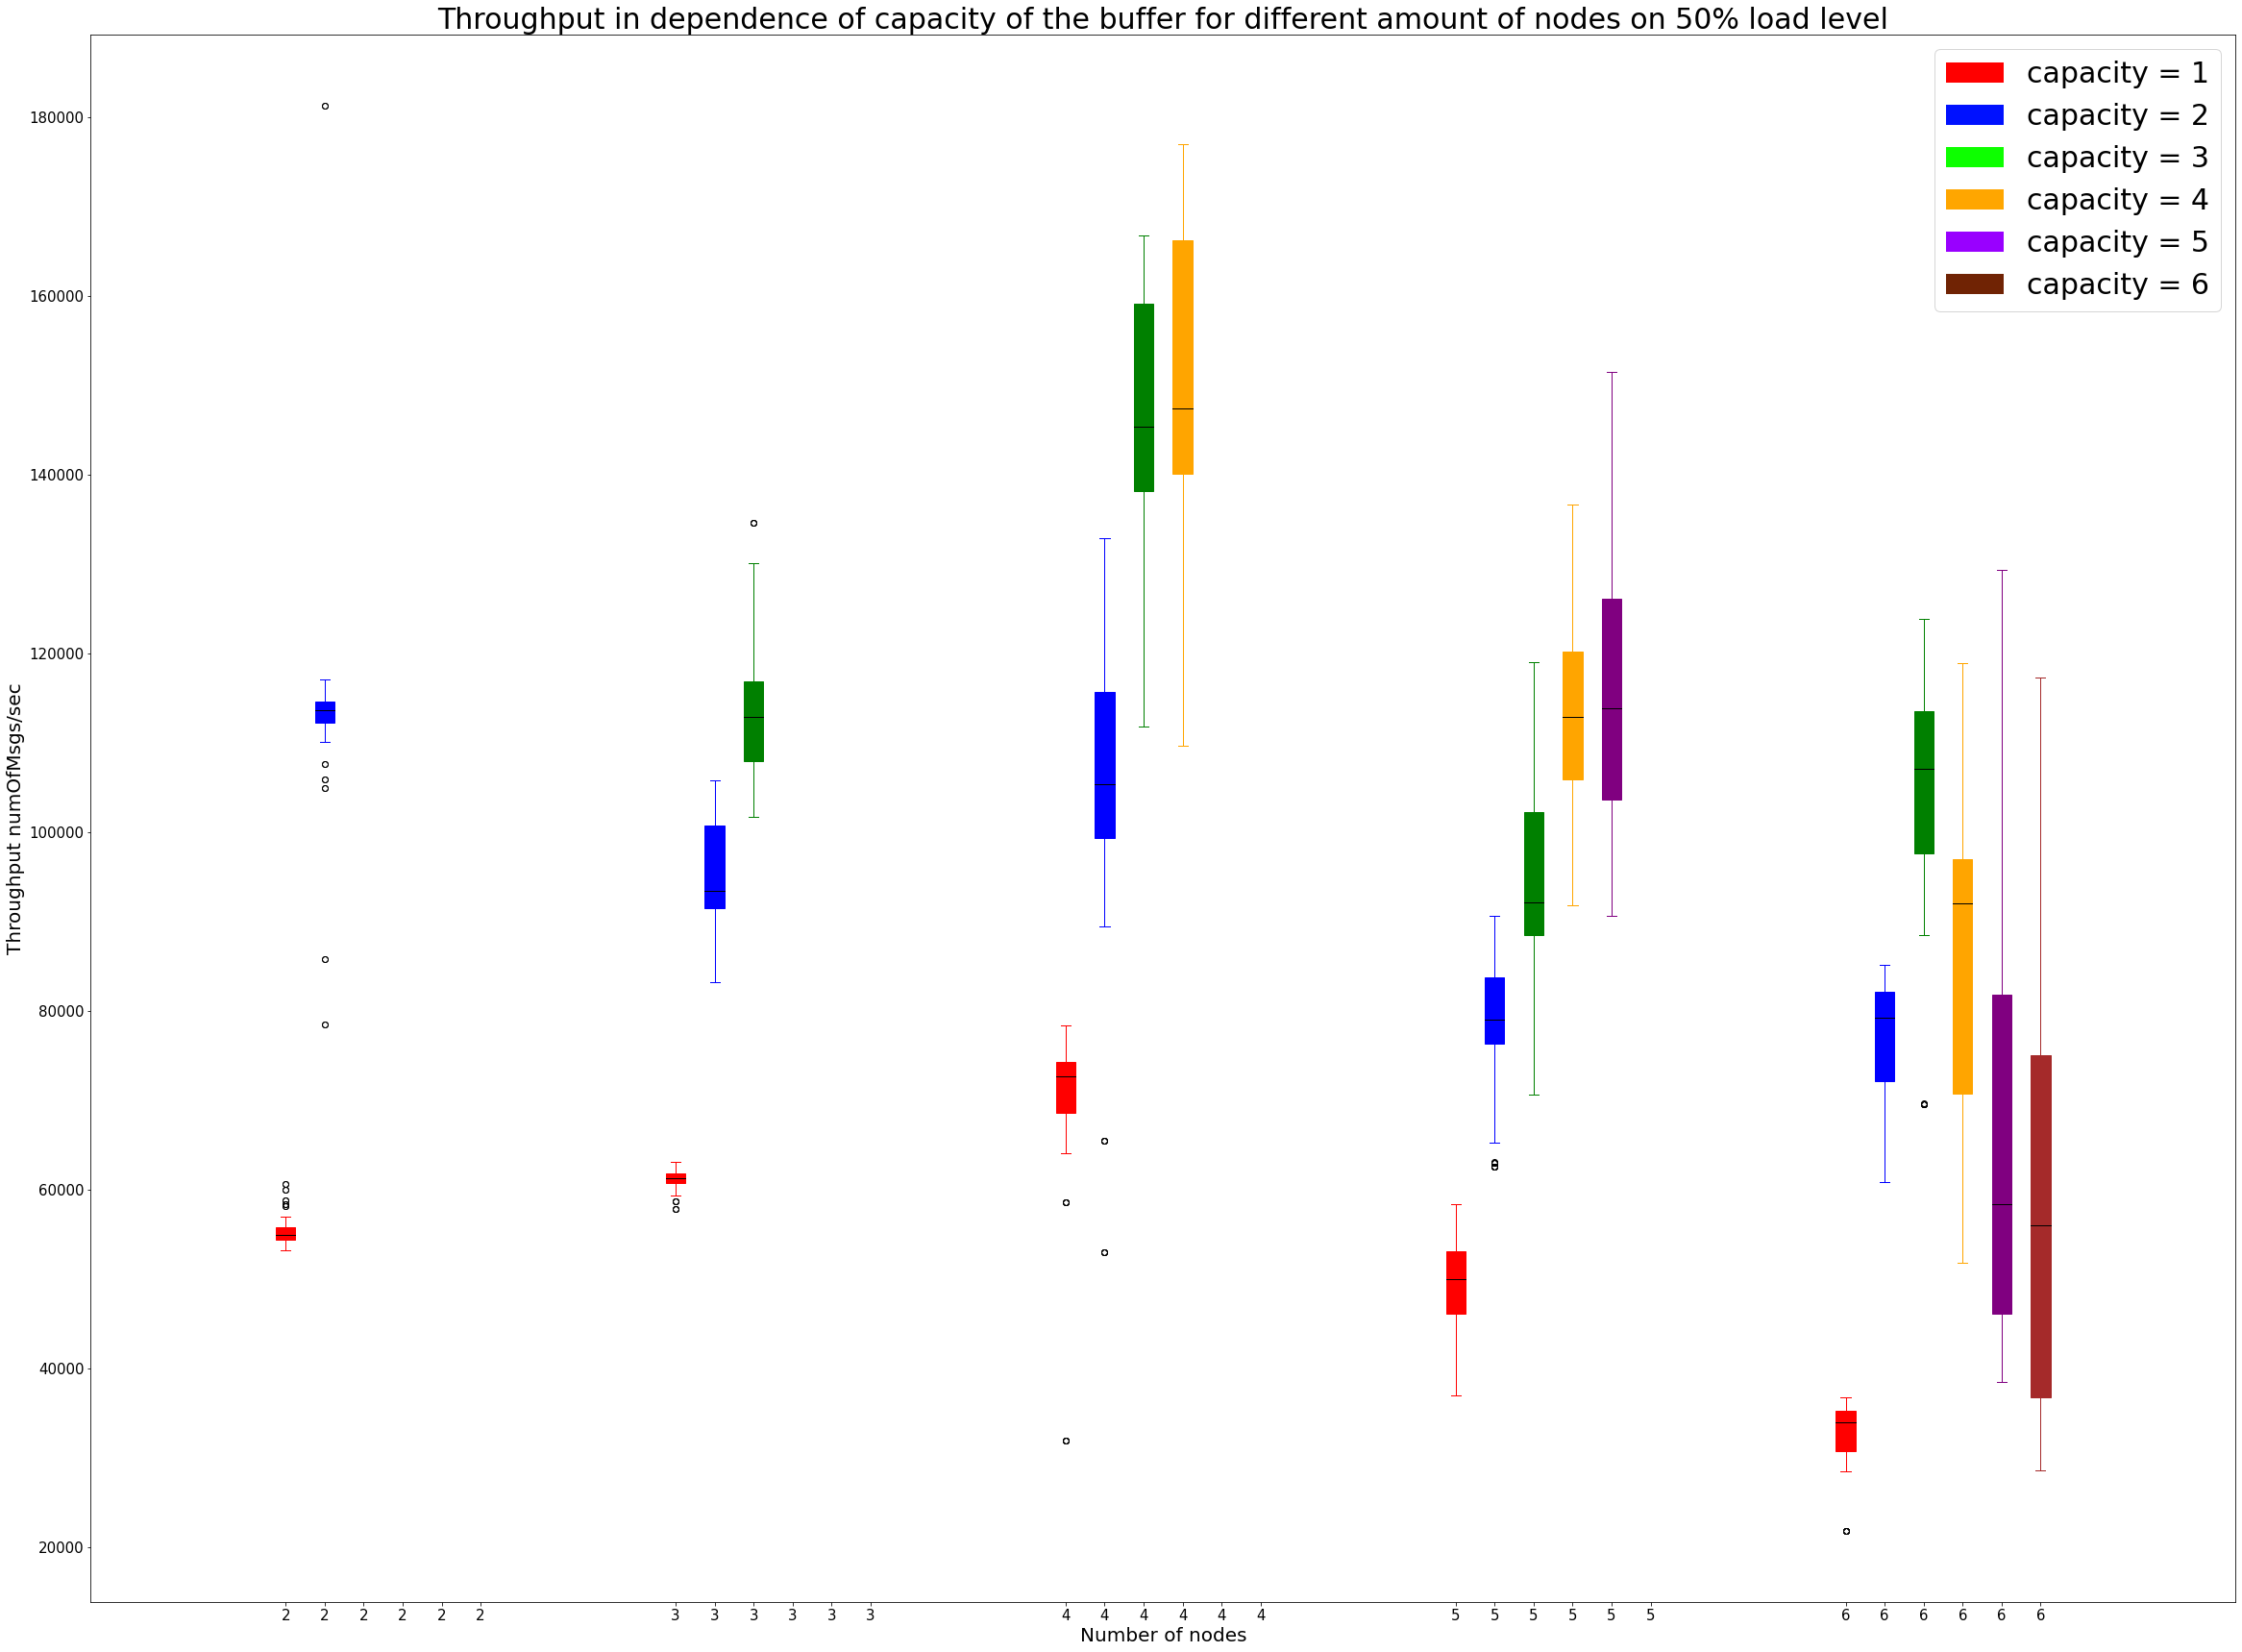

In [64]:
fig, ax = plt.subplots(figsize=(40,30))
draw_thputs([throughputs['2n1c2m'].values, throughputs['3n1c3m'], throughputs['4n1c4m'].values, throughputs['5n1c5m'].values, throughputs['6n1c6m'].values], 'red', 'red', -0.2)
draw_thputs([throughputs['2n2c3m'].values, throughputs['3n2c5m'], throughputs['4n2c6m'].values, throughputs['5n2c8m'].values, throughputs['6n2c9m'].values], 'blue', 'blue', - 0.1)
draw_thputs([[], throughputs['3n3c6m'], throughputs['4n3c8m'].values, throughputs['5n3c10m'].values, throughputs['6n3c12m'].values], 'green', 'green', + 0.0)
draw_thputs([[], [], throughputs['4n4c10m'].values, throughputs['5n4c13m'].values, throughputs['6n4c15m'].values], 'orange', 'orange', + 0.1)
draw_thputs([[], [], [], throughputs['5n5c15m'].values, throughputs['6n5c18m'].values], 'purple', 'purple', + 0.2)
draw_thputs([[], [], [], [], throughputs['6n6c21m'].values], 'brown', 'brown', + 0.3)
plt.xlabel('Number of nodes', fontsize = 20)
plt.ylabel('Throughput numOfMsgs/sec', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title( 'Throughput in dependence of capacity of the buffer for different amount of nodes on 50% load level', fontsize = 30)   
plt.legend((rect1, rect2, rect3, rect4, rect5, rect6), labels, prop={'size': 30})
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

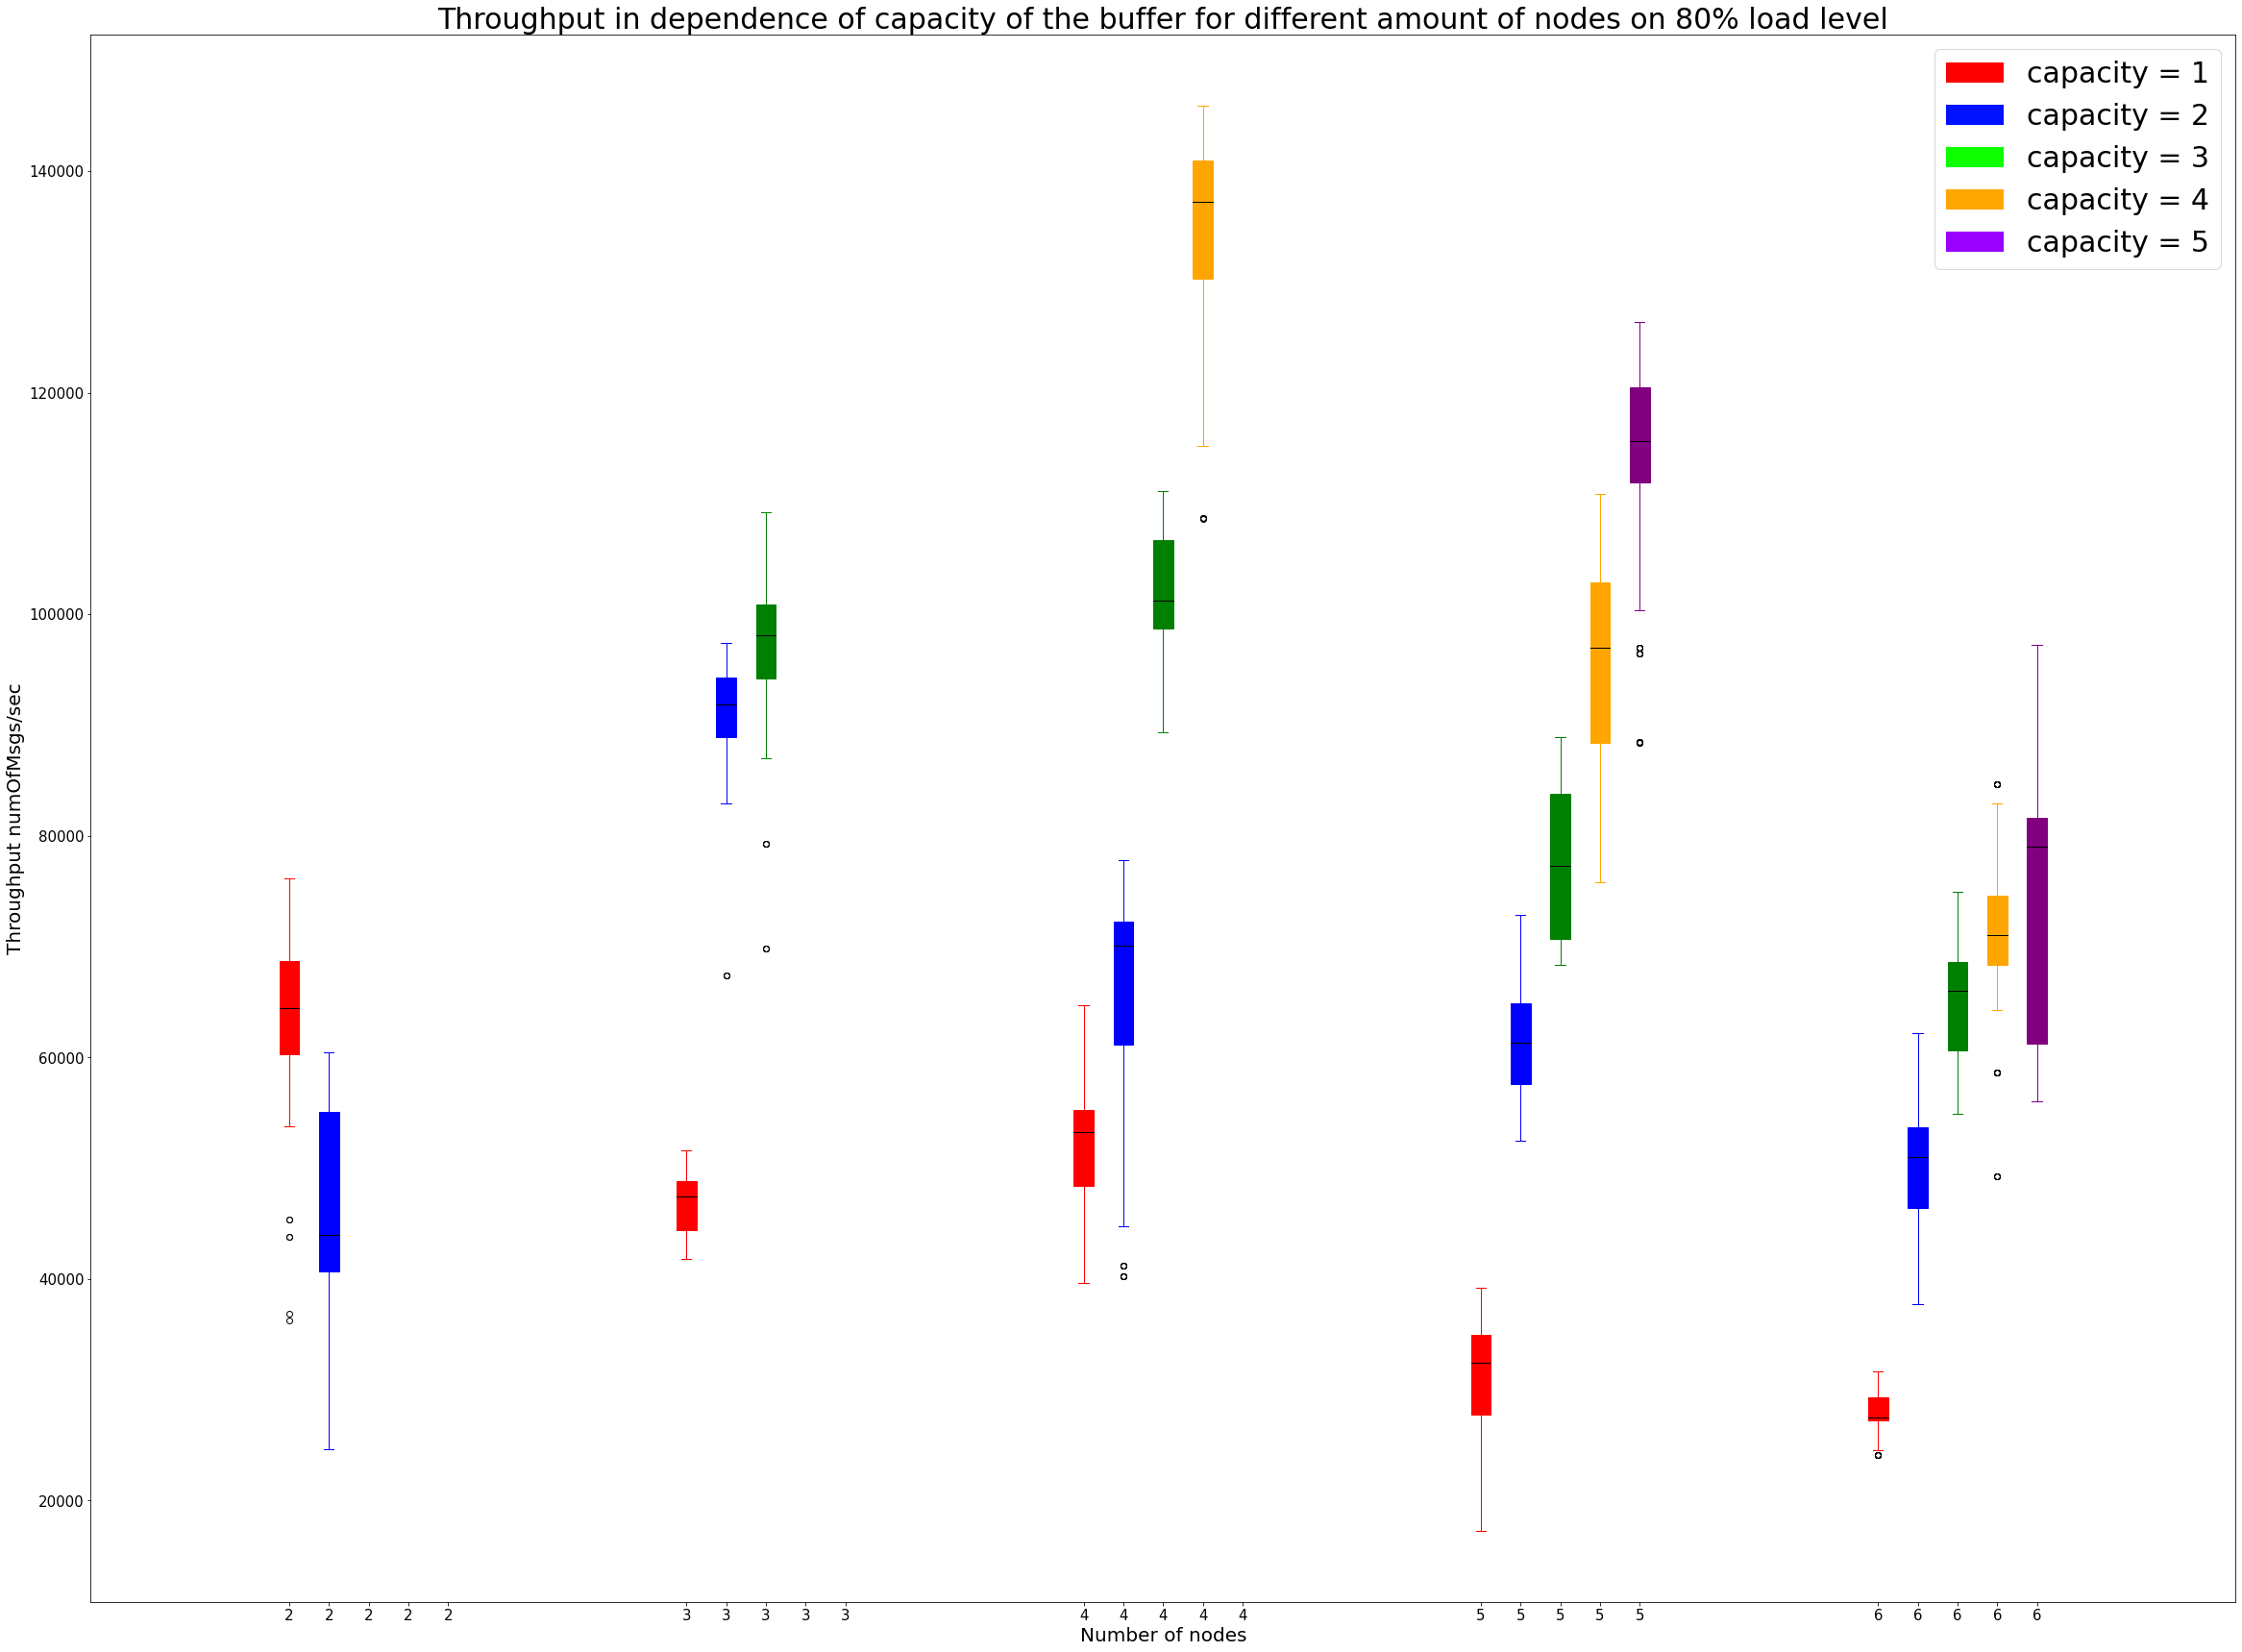

In [65]:
fig, ax = plt.subplots(figsize=(40,30))
draw_thputs([throughputs['2n1c3m'].values, throughputs['3n1c5m'], throughputs['4n1c6m'].values, throughputs['5n1c8m'].values, throughputs['6n1c10m'].values], 'red', 'red', -0.2)
draw_thputs([throughputs['2n2c5m'].values, throughputs['3n2c7m'], throughputs['4n2c10m'].values, throughputs['5n2c12m'].values, throughputs['6n2c15m'].values], 'blue', 'blue', - 0.1)
draw_thputs([[], throughputs['3n3c10m'], throughputs['4n3c13m'].values, throughputs['5n3c16m'].values, throughputs['6n3c20m'].values], 'green', 'green', + 0.0)
draw_thputs([[], [], throughputs['4n4c16m'].values, throughputs['5n4c20m'].values, throughputs['6n4c24m'].values], 'orange', 'orange', + 0.1)
draw_thputs([[], [], [], throughputs['5n5c24m'].values, throughputs['6n5c29m'].values], 'purple', 'purple', + 0.2)
labels = ['capacity = 1', 'capacity = 2', 'capacity = 3', 'capacity = 4', 'capacity = 5']
plt.xlabel('Number of nodes', fontsize = 20)
plt.ylabel('Throughput numOfMsgs/sec', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title( 'Throughput in dependence of capacity of the buffer for different amount of nodes on 80% load level', fontsize = 30)   
plt.legend((rect1, rect2, rect3, rect4, rect5), labels, prop={'size': 30})
plt.show()

## **Вывод по зависимости пропускной способности от размера очередей системы:**


Измерения и иллюстрации показывают, что размер очередей системы влияет на пропускную способность, увелилчивая ее при увеличении размера очереди на всех режимах работы системы, и для всего исследованного диапазона количества нод в системе и диапазона размера очередей.

## **Зависмость задержки и пропускной способности от количества токенов в системе:**

Возьмём 3 ноды с очередями размера от 1 до 3 и посмотрим задержку и пропускную способность от количества сообщений в системе

*Примечение: выбрана именно система с 3 нодами, поскольку она лучше всего будет смоделирована на имеющемся ПК.*

**Задержка:**

In [51]:
ltpm = pd.read_csv('LatMsgsCap.csv', delimiter=";")

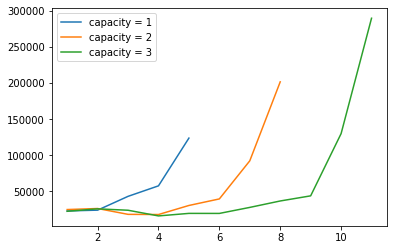

In [55]:
plt.plot(range(1,12,1), ltpm['1c'].values, label = 'capacity = 1')
plt.plot(range(1,12,1), ltpm['2c'].values, label = 'capacity = 2')
plt.plot(range(1,12,1), ltpm['3c'].values, label = 'capacity = 3')
plt.legend()
plt.show()

**Вывод:** 

Данная иллюстрация также подтверждает гипотезу о том, что размер очередей не имеет зметного влияния на задержку в сети. (Разница является следствием увеличившегося максимального количества сообщений, которые могут находиться в системе.)

**Throughput:**

In [46]:
tputs = pd.read_csv('Throughput3NodesdiffCap.csv', delimiter=";")

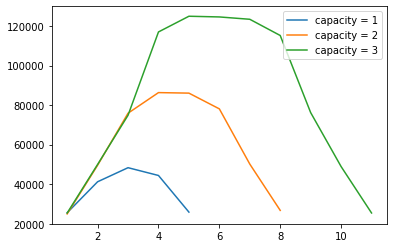

In [49]:
plt.plot(range(1,12,1), tputs['1c'].values, label = 'capacity = 1')
plt.plot(range(1,12,1), tputs['2c'].values, label = 'capacity = 2')
plt.plot(range(1,12,1), tputs['3c'].values, label = 'capacity = 3')
plt.legend()
plt.show()

**Вывод:**

Данная иллюстрация показывает, что пропускная способность сети может быть увличена путем увеличения размера очередей, используемых в системе.

## **Заключение:**

В данной работе исследована зависимость пропускной способности и задержки сети типа Token Ring с указанными допущениями, от размера очередей медиумов.

Данное исследование показало, что пропускная способность зависит от размера очередей, увеличиваясь с ростом размера очереди. Данный эффект может объясняться тем, что благодаря увеличению размера очереди пропадает время, затрачиваемое нодами на ожидание освобождения очереди другим потоком, а именно уменьшения времени ожидания потоком producer момента, когда поток consumer вычитает сообщение из очереди, тем самым предоставив свободное место для записи в данную очередь.